In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
H = 400 # Height of an image
W = 400 # Width of an image
f = 1200 # Focal distance

In [104]:
rays_o = np.zeros((H*W, 3)) # Focal origin
rays_d = np.zeros((H*W, 3)) # Direction of each ray

u = np.arange(W)
v = np.arange(H)

u, v = np.meshgrid(u, v) # initialize image grid

dirs = np.stack((u - W / 2,
                 -(v - H / 2),
                 -np.ones_like(u) * f), axis=-1) # stack the 3 vectors together
rays_d = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True) # normalize the direction vector
rays_d = rays_d.reshape(-1,3)

In [91]:
def plot_rays(o, d, t):
    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes(projection='3d')

    pt1 = o
    pt2 = o + t * d # where the ray is after time t

    for p1, p2 in zip(pt1[::10], pt2[::10]): # merge 2 stuff together (pytorch)
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]])

    plt.show()

In [100]:
#plot_rays(rays_o, rays_d, 1)

In [118]:
class Sphere:
    def __init__(self, position, radius, color):
        self.position = position
        self.radius = radius
        self.color = color

    def intersect(self, o, d):
        # (ox + t*dx - x_c)^2 + (oy + t*dy - y_c)^2 +(oz + t*dz - z_c)^2 = r^2
        # Solve the equation at^2 + bt + c = 0
        # [:, i] means the i-th column
        a = d[:, 0]**2 + d[:, 1]**2 + d[:, 2]**2
        b = 2 * ( d[:, 0] * (o[:, 0] - self.position[0]) +
                  d[:, 1] * (o[:, 1] - self.position[1]) +
                  d[:, 2] * (o[:, 2] - self.position[2])
                  )
        c = ((o[:, 0] - self.position[0])**2 +
             (o[:, 1] - self.position[1])**2 +
             (o[:, 2] - self.position[2])) - self.radius**2

        delta = b**2 - 4*a*c

        cond = delta >= 0

        num_rays = o.shape[0] # length of first dimension
        colors = np.zeros((num_rays, 3))

        colors[cond] = self.color
        return colors

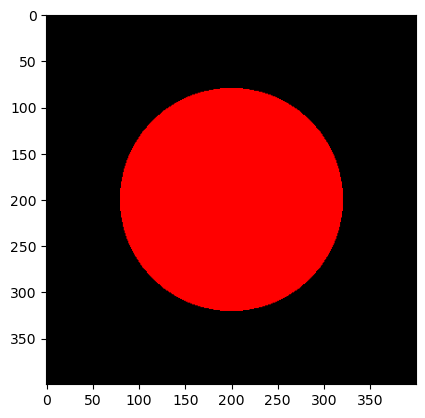

In [119]:
s = Sphere(np.array([0., 0., -1.]), .1, np.array([1., 0., 0.]))

# Ray tracing! Intersect the Sphere with infinite rays from origin to the pixels!
c = s.intersect(rays_o, rays_d)
img = c.reshape(H, W, 3)
plt.imshow(img)